<a href="https://colab.research.google.com/github/tehernandez/MIA_Actividades/blob/main/Proyecto_MIA_Clasificaci%C3%B3nTickets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
! pip install mpi4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
import time
from mpi4py import MPI
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_regression, load_digits
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [80]:
import os
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(ngram_range=(1,3))
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import LinearSVC
import nltk


In [81]:
dfDatostrain=pd.read_csv(r'tickets_2022_train.csv',index_col=0, encoding='latin-1')
dfDatostrain = dfDatostrain.replace(np.nan, "")
dfDatostrain


,TICKET,DESCRIPCION,DESCRIPCION_DET,FILA
NO,,,,
1,2.020000e+15,problema: Compras no guardadas en mPos,,TI_Desarrollo Comercial
2,2.020000e+15,Configuración de cliente 10304 para timbrado,NECESIDAD: \r\nFavor de configurar el cliente ...,TI_Desarrollo BackOffice
3,2.020000e+15,Solicitud de modelo SAP con sku´s,Saber cual es el modelo SAP con skus con el qu...,TI_Desarrollo Comercial
4,2.020000e+15,Borrar Prenda de Pedido,"Hola Shadey, me puedes ayudar a borrar una pre...",TI_Desarrollo Ecommerce
5,2.020000e+15,Error al generar reporte,PROBLEMA: \r\nMe aparece el siguiente mensaje ...,TI_Desarrollo BI
...,...,...,...,...
1155,2.020000e+15,Inconsistencia SAP TL450020002,"PROBLEMA: Favor de NO borrar esta sección, y r...",TI_Desarrollo Operaciones
1156,2.020000e+15,SECTOR INCORRECTO MOD 97001 OF 100232272,NECESIDAD: PARA EL MODELO 97001 OF 100232272 E...,TI_Desarrollo Operaciones
1157,2.020000e+15,Inconsistencia SAP TL450020005,PROBLEMA: Se tiene un traslado del material\r...,TI_Desarrollo Operaciones


In [82]:
dfDatostest=pd.read_csv(r'tickets_2022_test.csv',index_col=0, encoding='latin-1')
dfDatostest = dfDatostest.replace(np.nan, "")
dfDatostest

,TICKET,DESCRIPCION,DESCRIPCION_DET,FILA
NO,,,,
1159,2.020000e+15,ERROR EN EL INTERFACE,Ayúdanos a mejorar nuestra atención respondien...,TI_Desarrollo BackOffice
1160,2.020000e+15,FALLA EN DBP,,TI_Desarrollo BackOffice
1161,2.020000e+15,favor de apoyarnos a cancelar un folio de la t...,NECESIDAD: favor de apoyarnos a cancelar un f...,TI_Desarrollo MDW
1162,2.020000e+15,descarga de archivo pdf de manifiesto de embar...,NECESIDAD: \r\ndescarga de archivo pdf de mani...,TI_Desarrollo Operaciones
1163,2.020000e+15,Crear alteración,,TI_Desarrollo Comercial
...,...,...,...,...
2978,2.020000e+15,Nuevo atributo,NECESIDAD: Crear un nuevo atributo en PIM a n...,TI_Desarrollo Operaciones
2979,2.020000e+15,Por que existe diferencia del inventario final...,NECESIDAD: \r\nPor que existe diferencia del ...,TI_Desarrollo BackOffice Sofm
2980,2.020000e+15,Actualización de reporte power BI,NECESIDAD: \r\nSe requieren ajustes al reporte...,TI_Desarrollo BI


In [83]:
categoria = ['TI_Desarrollo BI',
 'TI_Desarrollo BackOffice',
 'TI_Desarrollo BackOffice Sofm',
 'TI_Desarrollo Comercial',
 'TI_Desarrollo Ecommerce',
 'TI_Desarrollo MDW',
 'TI_Desarrollo MPOS',
 'TI_Desarrollo Operaciones',
 'TI_Manhattan',
 'TI_Proyectos']
categoria


['TI_Desarrollo BI',
 'TI_Desarrollo BackOffice',
 'TI_Desarrollo BackOffice Sofm',
 'TI_Desarrollo Comercial',
 'TI_Desarrollo Ecommerce',
 'TI_Desarrollo MDW',
 'TI_Desarrollo MPOS',
 'TI_Desarrollo Operaciones',
 'TI_Manhattan',
 'TI_Proyectos']

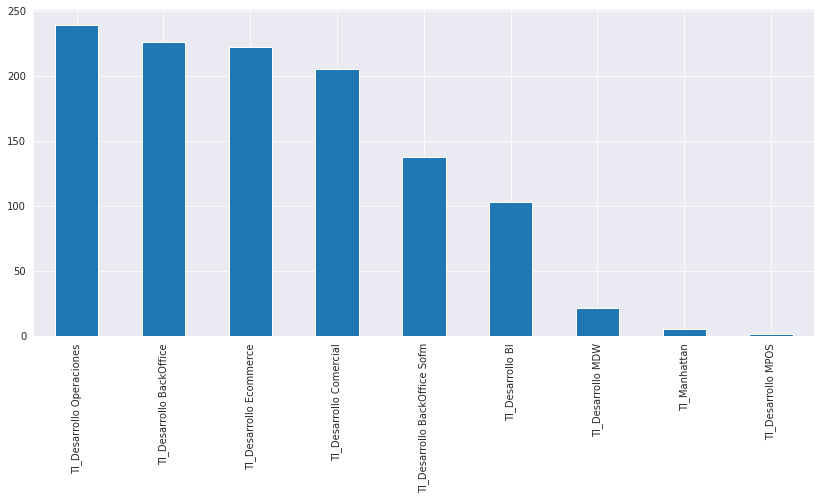

In [84]:
plt.figure(figsize=(14,6))
dfDatostrain.FILA.value_counts().plot(kind='bar')
plt.show()

In [91]:
encoder = LabelEncoder()
dfDatostrain['descripcion_number']=encoder.fit_transform(dfDatostrain.DESCRIPCION.values)
dfDatostrain['descripcion_det_number']=encoder.fit_transform(dfDatostrain.DESCRIPCION_DET.values)
dfDatostrain['fila_number']=encoder.fit_transform(dfDatostrain.FILA.values)
dfDatostrain

,TICKET,DESCRIPCION,DESCRIPCION_DET,FILA,descripcion_number,descripcion_det_number,fila_number
NO,,,,,,,
1,2.020000e+15,problema: Compras no guardadas en mPos,,TI_Desarrollo Comercial,889,0,3
2,2.020000e+15,Configuración de cliente 10304 para timbrado,NECESIDAD: \r\nFavor de configurar el cliente ...,TI_Desarrollo BackOffice,229,353,1
3,2.020000e+15,Solicitud de modelo SAP con sku´s,Saber cual es el modelo SAP con skus con el qu...,TI_Desarrollo Comercial,779,799,3
4,2.020000e+15,Borrar Prenda de Pedido,"Hola Shadey, me puedes ayudar a borrar una pre...",TI_Desarrollo Ecommerce,128,228,4
5,2.020000e+15,Error al generar reporte,PROBLEMA: \r\nMe aparece el siguiente mensaje ...,TI_Desarrollo BI,337,701,0
...,...,...,...,...,...,...,...
1155,2.020000e+15,Inconsistencia SAP TL450020002,"PROBLEMA: Favor de NO borrar esta sección, y r...",TI_Desarrollo Operaciones,399,774,7
1156,2.020000e+15,SECTOR INCORRECTO MOD 97001 OF 100232272,NECESIDAD: PARA EL MODELO 97001 OF 100232272 E...,TI_Desarrollo Operaciones,628,628,7
1157,2.020000e+15,Inconsistencia SAP TL450020005,PROBLEMA: Se tiene un traslado del material\r...,TI_Desarrollo Operaciones,400,766,7


In [93]:
X=dfDatostrain[['descripcion_number','descripcion_det_number']]
y=dfDatostrain['fila_number']


In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train =scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [128]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter =3500, 
                    alpha = 0.0001,solver = 'adam', random_state = 80, 
                    tol = 0.0001)


In [129]:
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)



In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.50      0.29      0.37        24
           1       0.18      0.15      0.16        48
           2       0.35      0.59      0.44        34
           3       0.34      0.22      0.27        49
           4       0.60      0.63      0.62        57
           5       0.00      0.00      0.00         4
           7       0.52      0.62      0.56        74

    accuracy                           0.44       290
   macro avg       0.36      0.36      0.35       290
weighted avg       0.42      0.44      0.42       290



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
